


<img src = "https://upload.wikimedia.org/wikipedia/commons/4/40/Vista_panor%C3%A1mica_desde_Olympiapark%2C_M%C3%BAnich%2C_Alemania_2012-04-28%2C_DD_03.JPG" width = 900> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Munich</font></h1>










## 1. Introduction 


Munich is the capital of Bavaria and the third-largest city in Germany, with a population of 1,558,395 inhabitants in 2020 [1]. Due to its high quality of life, its economic and cultural importance, Munich is a city that attracts investors, workers, families, and students, from Germany and abroad. It has a heated real estate market with high prices.

Our client is a real estate agency that operates in the city of Munich and seeks an effective tool to help its clients find the property they are looking for. The desired product is a model that classifies and maps the areas of the city according to the existing similarities. The classes found will help realtors to focus on the areas that best fit the profile of clients, Based on the service preferences that customers want in their future neighborhood.





## 2. Data and Methodology

Munich district data postal codes were scraped from web page https://www.muenchen.de/int/en/living/postal-codes.html and RESTful API calls were made to Foursquare API to retrieve the information about the venues. The Foursquare's data was used to find out the types of places in the neighborhood and the frequency with which they were visited. Data preparation was done using Pandas library. 

This project used a machine learning model to classify and map similar areas of the city. Specifically, the K-Means Clustering model. Clustering is a technique to divide data into different groups, were the records in each group are similar to one another. So, the goal of clustering is to identify significant and meaningfuk groups of data. K-means dividedes the data into K cluster by minimizing the sum of the squred distances os each record to the mean of its assigned cluster [2].




###  2.1 Data preparation

1. first of all, import the necessary libraries for this project.

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
#!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 
import folium # map rendering library

from unicodedata import normalize

2. Get the postcodes for the city of Munich.

In [2]:
df_munich0 = pd.read_html('https://www.muenchen.de/int/en/living/postal-codes.html')[0]

In [3]:
df_munich0.head()

,District,Postal Code
0,Allach-Untermenzing,"80995, 80997, 80999, 81247, 81249"
1,Altstadt-Lehel,"80331, 80333, 80335, 80336, 80469, 80538, 80539"
2,Au-Haidhausen,"81541, 81543, 81667, 81669, 81671, 81675, 81677"
3,Aubing-Lochhausen-Langwied,"81243, 81245, 81249"
4,Berg am Laim,"81671, 81673, 81735, 81825"


In [4]:
df_munich0 = df_munich0.rename(columns = {'Postal Code': 'Postal_Code'}, inplace = False)

3. Explode the dataframe to see all Postal codes.

In [5]:
df_munich = df_munich0.assign(Postal_Code = df_munich0.Postal_Code.str.split(',')).explode('Postal_Code').reset_index(drop=True)                                                 

In [6]:
df_munich.head(126)

,District,Postal_Code
0,Allach-Untermenzing,80995
1,Allach-Untermenzing,80997
2,Allach-Untermenzing,80999
3,Allach-Untermenzing,81247
4,Allach-Untermenzing,81249
5,Altstadt-Lehel,80331
6,Altstadt-Lehel,80333
7,Altstadt-Lehel,80335
8,Altstadt-Lehel,80336
9,Altstadt-Lehel,80469


In [7]:
df_munich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   District     127 non-null    object
 1   Postal_Code  127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


4. Get the latitude and longitude for each postal code. 

In [8]:
CLIENT_ID = 'SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO' # your Foursquare ID
CLIENT_SECRET = 'LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO
CLIENT_SECRET:LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV


In [9]:
df_munich1 = pd.DataFrame(columns=['District', 'Postal Code', 'Latitude', 'Longitude'])

# loop over all entries of old data frame and store according values
items = []
for idx, district in enumerate(df_munich['District']):
    code = df_munich['Postal_Code'][idx]
    address = district + ', ' + code # to get format of address

    geolocator = Nominatim(user_agent="mu_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    items.append({'District': district, 
                  'Postal Code': code,
                  'Latitude': latitude,
                  'Longitude': longitude})

In [10]:
df_munich1 = df_munich1.append(items)
df_munich1.head()

,District,Postal Code,Latitude,Longitude
0,Allach-Untermenzing,80995,48.195157,11.462973
1,Allach-Untermenzing,80997,48.195157,11.462973
2,Allach-Untermenzing,80999,48.195157,11.462973
3,Allach-Untermenzing,81247,48.195157,11.462973
4,Allach-Untermenzing,81249,48.195157,11.462973


In [11]:
df_munich1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     127 non-null    object 
 1   Postal Code  127 non-null    object 
 2   Latitude     127 non-null    float64
 3   Longitude    127 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


5. Viualization: Let's see all the postal codes on the map.

In [12]:
address = 'Munich, DE'

geolocator = Nominatim(user_agent="mu_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [13]:
map_munich = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_munich1['Latitude'], df_munich1['Longitude'], df_munich1['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

6. Next, we use the Foursquare API to explore the neighborhoods and segment them. 


In [14]:
CLIENT_ID = 'SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO' # your Foursquare ID
CLIENT_SECRET = 'LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SY20SPYHSSNDWZZFM3QTHWSRGHBX4NGEDFHXCQSSEAMFL2XO
CLIENT_SECRET:LAVDIFBYO03IUH1OS1N0HKCISYDDJYLAOMITOZHOTMNVULRV


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
munich_venues = getNearbyVenues(names=df_munich1['District'],
                                   latitudes=df_munich1['Latitude'],
                                   longitudes=df_munich1['Longitude']
                                  )

Allach-Untermenzing
Allach-Untermenzing
Allach-Untermenzing
Allach-Untermenzing
Allach-Untermenzing
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Altstadt-Lehel
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Au-Haidhausen
Aubing-Lochhausen-Langwied
Aubing-Lochhausen-Langwied
Aubing-Lochhausen-Langwied
Berg am Laim
Berg am Laim
Berg am Laim
Berg am Laim
Bogenhausen
Bogenhausen
Bogenhausen
Bogenhausen
Bogenhausen
Bogenhausen
Feldmoching-Hasenbergl
Feldmoching-Hasenbergl
Feldmoching-Hasenbergl
Hadern
Hadern
Hadern
Laim
Laim
Laim
Ludwigsvorstadt-Isarvorstadt
Ludwigsvorstadt-Isarvorstadt
Ludwigsvorstadt-Isarvorstadt
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Maxvorstadt
Milbertshofen-Am Hart
Milbertshofen-Am Hart
Milbertshofen-Am Hart
Milbertshofen-Am Hart
Moosach
Moosach
Moosach
Moosach
Moosach
Neuhausen-Nymphenburg
Neuhausen-Nym

In [17]:
munich_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            3412 non-null   object 
 1   District Latitude   3412 non-null   float64
 2   District Longitude  3412 non-null   float64
 3   Venue               3412 non-null   object 
 4   Venue Latitude      3412 non-null   float64
 5   Venue Longitude     3412 non-null   float64
 6   Venue Category      3412 non-null   object 
dtypes: float64(4), object(3)
memory usage: 186.7+ KB


In [18]:
munich_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Allach-Untermenzing,40,40,40,40,40,40
Altstadt-Lehel,700,700,700,700,700,700
Au-Haidhausen,259,259,259,259,259,259
Berg am Laim,27,27,27,27,27,27
Bogenhausen,72,72,72,72,72,72
Feldmoching-Hasenbergl,6,6,6,6,6,6
Hadern,30,30,30,30,30,30
Laim,57,57,57,57,57,57
Ludwigsvorstadt-Isarvorstadt,392,392,392,392,392,392


In [19]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 170 uniques categories.


In [20]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['District'] = munich_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

,District,Afghan Restaurant,American Restaurant,Arcade,Art Museum,Asian Restaurant,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cultural Center,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health & Beauty Service,Hill,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Laundry Service,Light Rail Station,Liquor Store,Manti Place,Market,Martial Arts School,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Museum,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Trail,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
munich_onehot.shape

(3412, 171)

In [22]:
munich_grouped1 = munich_onehot.groupby('District').mean().reset_index()
munich_grouped1


,District,Afghan Restaurant,American Restaurant,Arcade,Art Museum,Asian Restaurant,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cultural Center,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health & Beauty Service,Hill,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Laundry Service,Light Rail Station,Liquor Store,Manti Place,Market,Martial Arts School,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Museum,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Trail,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Altstadt-Lehel,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000,0.000000,0.010000,0.02,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0

In [23]:
munich_grouped2 = munich_grouped1.drop(munich_grouped1.index[5]).reset_index(drop=True)
munich_grouped = munich_grouped2.drop(['Bus Stop'], axis=1)
munich_grouped 

,District,Afghan Restaurant,American Restaurant,Arcade,Art Museum,Asian Restaurant,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cultural Center,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health & Beauty Service,Hill,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Laundry Service,Light Rail Station,Liquor Store,Manti Place,Market,Martial Arts School,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Museum,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Trail,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Altstadt-Lehel,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000,0.000000,0.010000,0.02,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.100000,0.01,0.000000,0.03,

The Feldmoching-Hasenbergl district has been excluded because it does not have enough observations. The venue bus stop was also excluded because it was not relevant for this model.

In [24]:
munich_grouped.shape

(23, 170)

In [25]:
num_top_venues = 5

for hood in munich_grouped['District']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                 venue  freq
0          Supermarket  0.25
1            Drugstore  0.25
2  Sporting Goods Shop  0.12
3   Italian Restaurant  0.12
4      Automotive Shop  0.12


----Altstadt-Lehel----
                 venue  freq
0                 Café  0.10
1                Hotel  0.07
2    German Restaurant  0.06
3                Plaza  0.05
4  Bavarian Restaurant  0.04


----Au-Haidhausen----
                venue  freq
0  Italian Restaurant  0.08
1   French Restaurant  0.05
2         Coffee Shop  0.05
3        Concert Hall  0.05
4     Cultural Center  0.03


----Berg am Laim----
           venue  freq
0    Supermarket  0.26
1      Drugstore  0.15
2  Metro Station  0.11
3           Café  0.11
4      Gastropub  0.11


----Bogenhausen----
                venue  freq
0           Drugstore  0.14
1              Bakery  0.14
2  Italian Restaurant  0.10
3                Park  0.08
4                Bank  0.08


----Hadern----
               venue  freq
0        Sup

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


In [28]:
# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = munich_grouped['District']


In [29]:
for ind in np.arange(munich_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

In [30]:
district_venues_sorted.head(56)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
1,Altstadt-Lehel,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Gourmet Shop,Restaurant,Church,Coffee Shop,Department Store
2,Au-Haidhausen,Italian Restaurant,French Restaurant,Concert Hall,Coffee Shop,Afghan Restaurant,Restaurant,Bistro,Japanese Restaurant,Movie Theater,Café
3,Berg am Laim,Supermarket,Drugstore,Hotel,Metro Station,Gastropub,Café,Business Service,Tram Station,Falafel Restaurant,Flower Shop
4,Bogenhausen,Drugstore,Bakery,Italian Restaurant,Bank,Greek Restaurant,Park,Supermarket,Pharmacy,Water Park,Dessert Shop
5,Hadern,Supermarket,German Restaurant,Hotel,Ice Cream Shop,Sandwich Place,Trattoria/Osteria,Bakery,Sushi Restaurant,Yoga Studio,Fish Market
6,Laim,Supermarket,Coffee Shop,Bank,Pastry Shop,Plaza,Mobile Phone Shop,Restaurant,Doner Restaurant,Drugstore,Sandwich Place
7,Ludwigsvorstadt-Isarvorstadt,Café,Bar,Pizza Place,Italian Restaurant,Asian Restaurant,Cocktail Bar,Vietnamese Restaurant,Ice Cream Shop,Restaurant,French Restaurant
8,Maxvorstadt,Café,Coffee Shop,Vietnamese Restaurant,Bar,Bakery,German Restaurant,Steakhouse,Event Space,Israeli Restaurant,Italian Restaurant
9,Milbertshofen-Am Hart,Bakery,Plaza,Supermarket,Greek Restaurant,Drugstore,Thai Restaurant,Food & Drink Shop,Soccer Field,Metro Station,Gastropub


## 3. Cluster Neighbourhoods


The Elbow method was used to define the best number of clusters in the model. The best K found was 5. 

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
munich_grouped_clustering = munich_grouped.drop('District',1)

In [33]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(munich_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

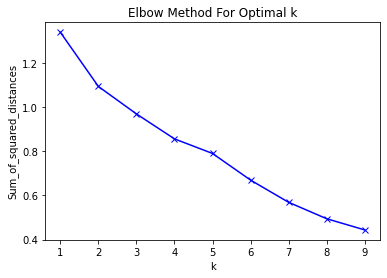

In [34]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 4, 3, 0, 0, 0, 4, 4, 0])

In [36]:

district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

munich_merged = df_munich1

munich_merged = munich_merged.join(district_venues_sorted.set_index('District'), on='District')

munich_merged = munich_merged.dropna()

munich_merged.head() # check the last columns!

,District,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,80995,48.195157,11.462973,3.0,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
1,Allach-Untermenzing,80997,48.195157,11.462973,3.0,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
2,Allach-Untermenzing,80999,48.195157,11.462973,3.0,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
3,Allach-Untermenzing,81247,48.195157,11.462973,3.0,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
4,Allach-Untermenzing,81249,48.195157,11.462973,3.0,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop


In [37]:
munich_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 126
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                121 non-null    object 
 1   Postal Code             121 non-null    object 
 2   Latitude                121 non-null    float64
 3   Longitude               121 non-null    float64
 4   Cluster Labels          121 non-null    float64
 5   1st Most Common Venue   121 non-null    object 
 6   2nd Most Common Venue   121 non-null    object 
 7   3rd Most Common Venue   121 non-null    object 
 8   4th Most Common Venue   121 non-null    object 
 9   5th Most Common Venue   121 non-null    object 
 10  6th Most Common Venue   121 non-null    object 
 11  7th Most Common Venue   121 non-null    object 
 12  8th Most Common Venue   121 non-null    object 
 13  9th Most Common Venue   121 non-null    object 
 14  10th Most Common Venue  121 non-null    ob

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



In [39]:
munich_merged['Cluster Labels'] = munich_merged['Cluster Labels'].astype(int)

In [40]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['Latitude'], munich_merged['Longitude'], munich_merged['District'],munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [41]:
munich_merged.head(120)

,District,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,80995,48.195157,11.462973,3,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
1,Allach-Untermenzing,80997,48.195157,11.462973,3,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
2,Allach-Untermenzing,80999,48.195157,11.462973,3,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
3,Allach-Untermenzing,81247,48.195157,11.462973,3,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
4,Allach-Untermenzing,81249,48.195157,11.462973,3,Supermarket,Drugstore,Italian Restaurant,Sporting Goods Shop,Automotive Shop,Bakery,Event Space,Food & Drink Shop,Food,Flower Shop
5,Altstadt-Lehel,80331,48.137828,11.574582,4,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Gourmet Shop,Restaurant,Church,Coffee Shop,Department Store
6,Altstadt-Lehel,80333,48.137828,11.574582,4,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Gourmet Shop,Restaurant,Church,Coffee Shop,Department Store
7,Altstadt-Lehel,80335,48.137828,11.574582,4,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Gourmet Shop,Restaurant,Church,Coffee Shop,Department Store
8,Altstadt-Lehel,80336,48.137828,11.574582,4,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Gourmet Shop,Restaurant,Church,Coffee Shop,Department Store
9,Altstadt-Lehel,80469,48.137828,11.574582,4,Café,Hotel,German Restaurant,Plaza,Bavarian Restaurant,Gourmet Shop,Restaurant,Church,Coffee Shop,Department Store


## 4. Results and Discussion

The city of Munich was divided into 5 clusters according to the similarities found in the Foursquare venues data. That the city of Munich is somehow homogeneous, with many supermarkets, bakeries, restaurants, cafés, and oder facilities.

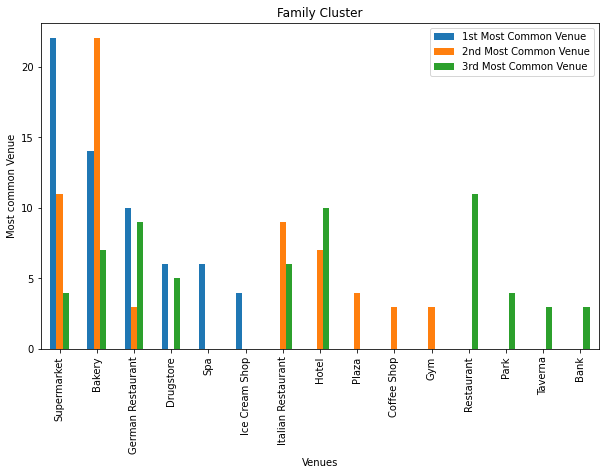

In [57]:
#Family cluster

cluster0 = munich_merged.loc[munich_merged['Cluster Labels'] == 0, munich_merged.columns[[0,1] + list(range(5,munich_merged.shape[1]))]]
family_cluster1 = cluster0['1st Most Common Venue'].value_counts().to_frame()
family_cluster2 = cluster0['2nd Most Common Venue'].value_counts().to_frame()
family_cluster3 = cluster0['3rd Most Common Venue'].value_counts().to_frame()

frames = [family_cluster1, family_cluster2, family_cluster3 ]
family_cluster = pd.concat(frames, axis=1).fillna(0).astype(int)

# Bar chart
family_cluster.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Most common Venue') # add y-label to the plot
plt.title('Family Cluster') # add title to the plot

plt.show()

The first cluster, number 0, is the bigest cluster in the city. This cluster is a good area for families with children, which is why we call it family cluster. It has many supermarkets, bakeries, drugstores, and other facilities like gyms, and ice cream stores.


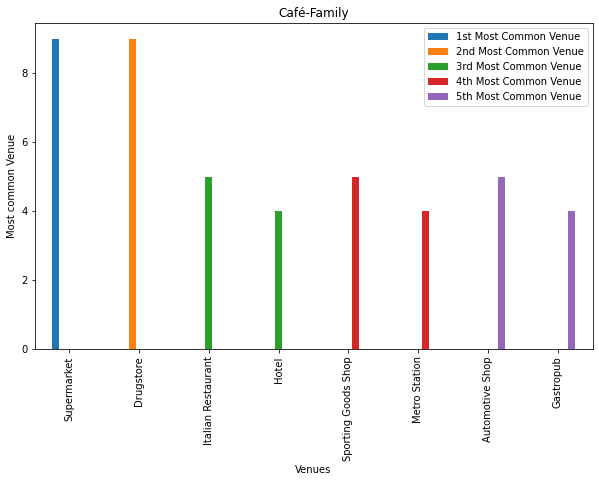

In [54]:
#Cluster 3
cluster3 = munich_merged.loc[munich_merged['Cluster Labels'] == 3, munich_merged.columns[[0,1] + list(range(5,munich_merged.shape[1]))]]
cluster31 = cluster3['1st Most Common Venue'].value_counts().to_frame()
cluster32 = cluster3['2nd Most Common Venue'].value_counts().to_frame()
cluster33 = cluster3['3rd Most Common Venue'].value_counts().to_frame()
cluster34 = cluster3['4th Most Common Venue'].value_counts().to_frame()
cluster35 = cluster3['5th Most Common Venue'].value_counts().to_frame()
frames3 = [cluster31, cluster32, cluster33,cluster34, cluster35]
cluster_3 = pd.concat(frames3, axis=1).fillna(0).astype(int)
cluster_3

# Bar chart
cluster_3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Most common Venue') # add y-label to the plot
plt.title('Café-Family') # add title to the plot

plt.show()

The cluster 3 is a good area for people who do not want to live in the center, but still want restaurants, cafes, hotels, gastropub, nightlife and also good facilities for families like supermarkets, drugstores. These are good areas for young families, we call this cluster Café-Family cluster.

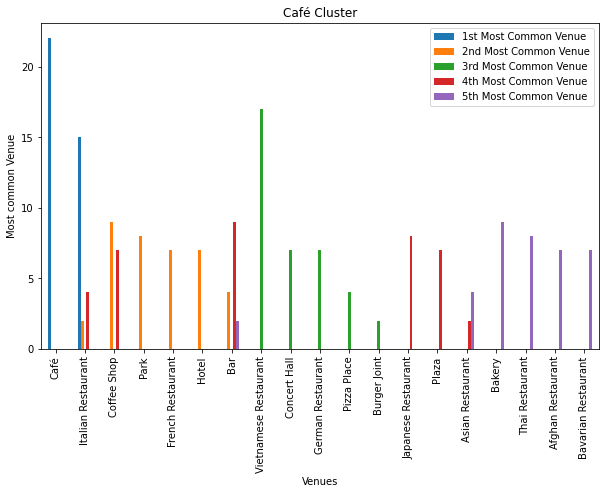

In [56]:
#Cluster 4
cluster4 = munich_merged.loc[munich_merged['Cluster Labels'] == 4, munich_merged.columns[[0,1] + list(range(5,munich_merged.shape[1]))]]
cluster41 = cluster4['1st Most Common Venue'].value_counts().to_frame()
cluster42 = cluster4['2nd Most Common Venue'].value_counts().to_frame()
cluster43 = cluster4['3rd Most Common Venue'].value_counts().to_frame()
cluster44 = cluster4['4th Most Common Venue'].value_counts().to_frame()
cluster45 = cluster4['5th Most Common Venue'].value_counts().to_frame()
frames4 = [cluster41, cluster42, cluster43, cluster44, cluster45]
cluster_4 = pd.concat(frames4, axis=1).fillna(0).astype(int)
cluster_4

# Bar chart
cluster_4.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Most common Venue') # add y-label to the plot
plt.title('Café Cluster') # add title to the plot

plt.show()

The central area of the city belongs Café Cluster, these neighborhoods together presented as '1st most common place', 22 cafes, 12 bakeries, 8 taverns, 7 Italian restaurants, 4 ice cream parlors. Apparently, this is a perfect cluster for those who like to go out for a bar, concert hall and have an active life.

Two clusters presented only one district: Schwabing-Freimann (Cluster 1) and Sendling Westpark (Cluster 2). Schwabing-Freimann Presented an interesting diversity of venues. The district's '1st Most Common Venue' was fast food restaurant. The district also had gyms fitness centers, hotels, Yoga studios, and food and drink shops. Sendling Westpark also featured interesting types of locations. the most commonplace was the ice cream shop, the neighborhood also has a commercial service, tunnel, cafeteria, gym/fitness center, Italian restaurants, yoga studio, space for events.


## 5. Conclusion

Despite the limitations of the data, it was possible to have an overview of similar areas existing in the city of Munich. The aim of this study was to facilitate the work of real estate agents, who, according to the clusters found, can focus the search for properties in similar areas based on the preferences of their clients.

## 6. Bibliography

[1] Wikipedia. https://en.wikipedia.org/wiki/Munich 

[2]Peter Bruce, Andrew Bruce, Peter Gedeck. "Practical Statistics for Data Scientists, 2nd Edition". O'Reilly, May 2010.

